**Inclass: Regression Model and Practical Statistic**
- Course Length: 9 hours
- Instructor : Dyah Nurlita
- Last Updated: Dec 2021

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from helper import linearity_test

# Introduction

Machine learning bertujuan untuk membuat mesin yang belajar berdasarkan data. Machine learning terbagi dua:

<img src="assets/versus.png" width="500">


**Supervised Learning**: 

* memiliki target variable. 
* untuk pembuatan model prediksi (y ~ x)
* ada ground truth (label aktual) sehingga ada evaluasi model

**Unsupervised Learning**: 

* tidak memiliki target variable. 
* untuk mencari pola dalam data sehingga menghasilkan informasi yang berguna/dapat diolah lebih lanjut. umumnya dipakai untuk tahap explanatory data analysis (EDA)/data pre-processing.
* tidak ada ground truth sehingga tidak ada evaluasi model 

# Regression Model

Regression model merupakan **Supervised Learning** karena data yang dibutuhkan harus memiliki target variabel (y). Target variabel dari Regression Model harus bertipe numerik, namun untuk prediktornya (x) boleh numerik/kategorik

📝**Business Problem**

Pemilihan variabel target biasanya dikaitkan dengan masalah bisnis yang ingin diselesaikan:

1. Sebuah agen properti berusaha membangun sebuah model untuk menebak harga sebuah properti untuk digunakan sebagai acuan kontrol dalam menjaga harga pasar. Untuk itu mereka mengembangkan sebuah model dengan:

     * Variabel target: harga properti/harga pasar
     * Variabel prediktor: luas bangunan, jumlah kamar, fasilitas, lokasi, luas tanah, dll

2. Seorang pemilik restoran ingin menebak berapa banyak penjualan yang akan dihasilkan di bulan depan oleh restorannya.  Untuk itu mereka mengembangkan sebuah model dengan:

     * Variabel target: banyak penjualan -> omset
     * Variabel prediktor: jumlah variasi menu, jumlah konsumen, harga product, hari dan jam pemesanan (buka/tidak), discount, dll

## Simple Linear Regression

### Regression Modeling Workflow

 #### Import data

Kita akan gunakan data `copiers.csv` yang tersimpan di folder data_input.

In [4]:
copiers = pd.read_csv("data_input/copiers.csv")

In [5]:
copiers.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
0,336,CA-2015-137946,9/1/15,9/4/15,Second Class,DB-13615,Consumer,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944
1,393,US-2014-135972,9/21/14,9/23/14,Second Class,JG-15115,Consumer,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883
2,407,CA-2017-117457,12/8/17,12/12/17,Standard Class,KH-16510,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913
3,516,CA-2017-127432,1/22/17,1/27/17,Standard Class,AD-10180,Home Office,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770
4,596,CA-2014-131450,8/8/14,8/15/14,Standard Class,LR-16915,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913


Data di atas merupakan data historis transaksi dari suatu online retail, berikut deskripsi variabel dari data tersebut:
- `Order.ID`     : ID transaksi
- `Order.Date`   : Tanggal transaksi
- `Ship.Date`    : Tanggal pengiriman barang
- `Ship.Mode`    : Jenis pengiriman yang digunakan (Standard Class, Second Class, First Class, Same Day)
- `Customer.ID`  : ID pelanggan
- `Segment`      : Segmen pelanggan (Consumer, Corporate, Home Office)
- `Product.ID`   : ID barang
- `Category`     : Kategori barang
- `Sub.Categoory`: Sub kategori barang
- `Product.Name` : Nama barang
- `Sales`        : Harga barang (USD)
- `Quantity`     : Jumlah barang yang dibeli
- `Discount`     : Potongan harga (%)
- `Profit`       : Keuntungan yang diperoleh (USD)

#### Inspect data berdasarkan struktur datanya

In [6]:
## code here
copiers.dtypes

Row.ID            int64
Order.ID         object
Order.Date       object
Ship.Date        object
Ship.Mode        object
Customer.ID      object
Segment          object
Product.ID       object
Category         object
Sub.Category     object
Product.Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Tipe data yang belum sesuai adalah : 
- order.date, ship.Date -> Datetime
- category, sub.category, segment, ship.mode -> category

In [7]:
copiers['Sub.Category'].unique()

array(['Copiers'], dtype=object)

In [8]:
## code here
copiers['Order.Date'] = copiers['Order.Date'].astype("datetime64")
copiers['Ship.Date'] = copiers['Ship.Date'].astype("datetime64")

copiers[['Ship.Mode','Segment','Category','Product.Name']] = copiers[['Ship.Mode','Segment','Category','Product.Name']].astype('category')


In [9]:
copiers.dtypes

Row.ID                   int64
Order.ID                object
Order.Date      datetime64[ns]
Ship.Date       datetime64[ns]
Ship.Mode             category
Customer.ID             object
Segment               category
Product.ID              object
Category              category
Sub.Category            object
Product.Name          category
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

#### Cek missing value

In [10]:
## code here
copiers.isna().sum()

Row.ID          0
Order.ID        0
Order.Date      0
Ship.Date       0
Ship.Mode       0
Customer.ID     0
Segment         0
Product.ID      0
Category        0
Sub.Category    0
Product.Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


#### Mendefinisikan Business Problem

Ingin memprediksi **Profit** berdasarkan nilai **Sales**. Tentukan:

- Variabel target: Profit
- Variabel prediktor: Sales

#### Eksplorasi data

* Cek persebaran data

  + Cek persebaran variabel Profit dan Sales:   

    - histogram atau boxplot

<AxesSubplot:>

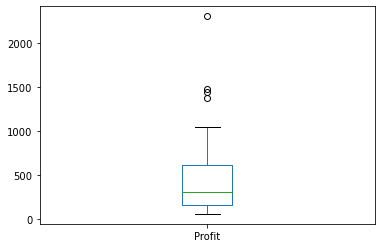

In [11]:
copiers['Profit'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

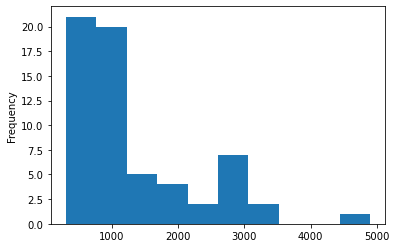

In [12]:
copiers['Sales'].plot(kind='hist')

> Pada variabel Profit dan Sales terdapat outlier. 

* **Cek korelasi antar variabel target dan prediktor**

    - menggunakan nilai korelasi

In [13]:
copiers['Sales'].corr(copiers['Profit'])

0.93957848999425

In [14]:
copiers.corr()

,Row.ID,Sales,Quantity,Discount,Profit
Row.ID,1.000000,-0.025585,0.080826,0.043612,-0.049402
Sales,-0.025585,1.000000,0.797954,-0.193645,0.939578
Quantity,0.080826,0.797954,1.000000,0.015672,0.685993
Discount,0.043612,-0.193645,0.015672,1.000000,-0.432338
Profit,-0.049402,0.939578,0.685993,-0.432338,1.000000


    - menggunakan visualisasi

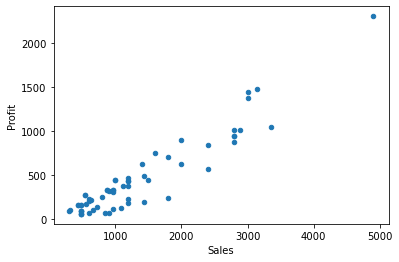

In [15]:
copiers.plot.scatter(x='Sales', y='Profit')
plt.show()

* **Kesimpulan dari plot:**

> Data linier, semakin tinggi Sales maka Profit akan semakin naik. Memiliki hubungan korelasi yang kuat.

Formula model regresi:

$$
\hat{y}=\beta_0+\beta_1.x_1+...+\beta_n.x_n
$$

dimana $Y$ merupakan target dan $x_1,...,x_n$ prediktor lainnya

y = b0 + b1x
- y : nilai prediksi target variabel
- b0 : nilai intercept (nilai target variabel ketika kita tidak memiliki prediktor sama sekali)
- b1 : nilai slope (nilai kemiringan garis regresi / nilai kontribusi prediktor dalam menentukan target variabel)


#### Membuat Model Regresi

**1. Model dengan outlier** 

Selanjutnya jika kita ingin menjawab dari business problem yang kita miliki, yaitu kita ingin melakukan prediksi nilai **Profit** berdasarkan nilai **Sales**.

Untuk membuat model regresi linier di Python kita akan menggunakan fungsi `OLS()` dari package `statsmodels`.
- a. Menentukan target dan prediktor
   - Y   : `df['target']`
   - X   : `sm.add_constant(df['prediktor'])`. Supaya intercept tidak dianggap 0
- b. Membuat model regresi linier `sm.OLS(target, prediktor).fit()`
- c. Menginterpretasikan model
   - intercept dan slope: `model.params`
   - summary model      : `model.summary()`  

In [16]:
# define predictor variable
X_data = copiers['Sales']
X_data = sm.add_constant(X_data)

#define target variable
Y_data = copiers['Profit']

# build model with outlier
lm_outlier = sm.OLS(Y_data, X_data).fit()

lm_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     452.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.27e-29
Time:                        23:19:53   Log-Likelihood:                -397.68
No. Observations:                  62   AIC:                             799.4
Df Residuals:                      60   BIC:                             803.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.0625     32.627     -3.496      0.001    -179.327     -48.798
Sales          0.4229      0.020     21.260      0.000       0.383       0.463
==============================================================================
Omnibus:                        2.345   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.652
Skew:                          -0.380   Prob(JB):                        0.438
Kurtosis:                       3.250   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Hasil Visualisasi**

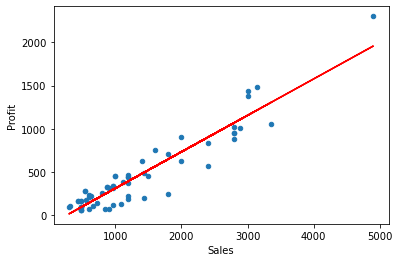

In [17]:
copiers.plot.scatter(x='Sales', y='Profit')
plt.plot(copiers['Sales'], lm_outlier.fittedvalues, c='red')
plt.show()


📝 **Interpretasi model :**

1. Model linier regresi untuk kasus Profit prediction adalah `Profit = -114.06251 + 0.42286*Sales`
      - **slope    : setiap kenaikan Sales sebesar 1 USD, profit akan naik sebesar 0.42286 USD. Dan sebaliknya, ketika Sales turun 1 USD, Profit akan turun sebesar 0.42286 USD**
      - **intercept: ketika Sales sama dengan 0 (tidak ada penjualan sama sekali), maka profit yang diperoleh adalah -114.06251 USD. Online retail akan rugi ketika tidak ada penjualan sama sekali, karena cost (fix cost) masih tetap dibayarkan**
   
2. Signifikansi prediktor (bandingkan nilai p-value dengan alpha)
   - H0: Sales tidak mempengaruhi Profit
   - H1: Sales mempengaruhi Profit
   
       - p-value Sales = 0.000
       - P-value Sales < 0.05 : Sales mempengaruhi profit
       - Ketika p-value < 0.05 (alpha) maka kesimpulannya adalah menolak H0
       - Sales signifikan berpengaruh terhadap Profit (p-value=0 < alpha=0.05).
   
3. Goodness of fit (melihat nilai R-squared, dimana **0 ≤ $R^2$ ≤ 1**)
   
   Nilai R-Squared merepresentasikan % variasi dari data yang berhasil dijelaskan oleh model. **Formula**:  
      
   $R^2=1- \frac {∑ \limits_{i=1}^n (Y_i−\hat Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$
   
   - Semakin mendekati 1, mengindikasikan model semakin fit
   - Semakin mendekati 0, mengindikasikan model tidak fit
  
  0.883 -> **Sebesar 88% variansi variable Profit dijelaskan oleh Sales, sisanya dijelaskan oleh factor lain yang belum diketahui.**

**[Optional] Other Information in Summary**

1. Tabel 1, sisi kiri menyimpan informasi dasar dari model
    - Dep. Variable   : Target variabel (Y)
    - Model           : Model regresi linier
    - Method          : Metode yang digunakan untuk membuat model regresi linier
    - No. Observations:	Jumlah observasi yang digunakan ketika membuat model regresi linier
    - DF Residuals    :	Degrees of freedom error/residual (**No. Observations - parameter**)
    - DF Model        :	Degrees of freedom model (**jumlah prediktor**)


2. Tabel 1, sisi kanan menyimpan informasi kebaikan model
    - **R-squared**         : Goodness of fit
    - **Adj. R-squared**    : Goodneess of fit untuk multiple linear regression
    - F-statistic       : Statistik hitung dari F-test (uji simultan)
    - Prob (F-statistic): p-value dari F-test 
        
        a. H0 --> Tidak ada prediktor yang berpengaruh signifikan terhadap target
        
        b. H1 --> Min terdapat 1 prediktor yang berpengaruh signifikan terhadap target
    - Log-likelihood    : Log dari nilai likelihood.
    - AIC               : Akaike Information Criterion (information loss)
    - BIC               : Bayesian Information Criterion (serupa dengan AIC, namun perhitungan nilainya berbeda)

3. Tabel 2 menyimpan informasi dari koefisien regresi
    - **coef**              : Estimasi koefisien
    - std err               : Estimasi selisih nilai sampel terhadap populasi
    - t                     : Statistik hitung dari t-test (uji parsial)
    - **P > |t|**               : P-value dari t-test
    - [95.0% Conf. Interval]: Confidence Interval (CI) 95%


4. Tabel 3 menyimpan hasil uji statistik error/residual
    - Skewness: Mengukur kecondongan distribusi error
    - Kurtosis:	Mengukur keruncingan distribusi error
    - Omnibus	D’Angostino’s test: Statistik hitung untuk pengujian **Skewness** dan **Kurtosis**
    - Prob(Omnibus): p-value dari **Omnibus	D’Angostino’s test**
    - Jarque-Bera:	Serupa dengan **Omnibus	D’Angostino’s test**, namun memiliki perhitungan yang berbeda
    - Prob (JB): p-value dari **Jarque-Bera**
    - Durbin-Watson: Statistik hitung pengujian autokorelasi
    - Cond. No: Pengujian multicolinearity

#### Melakukan Prediksi Model

Jika pada suatu hari perusahaan memperoleh nilai dari penjualan (*Sales*) sebesar 4797 USD. Berapa keuntungan yang diperoleh?

In [18]:
## code here
intercept = lm_outlier.params[0]
slope = lm_outlier.params[1]

profit_new = intercept + (slope*4797)
profit_new

1914.391134418754

Untuk melakukan prediksi terhadap beberapa nilai penjualan (*Sales*), dapat menggunakan `model.predict()`

Eg : Data penjualan terbaru

In [19]:
new_sales = pd.DataFrame({'Sales': (4797, 4650, 5600, 210)})
new_sales

,Sales
0,4797
1,4650
2,5600
3,210


In [20]:
## code here
X_new = sm.add_constant(new_sales['Sales'])

lm_outlier.predict(X_new)

0    1914.391134
1    1852.230891
2    2253.946748
3     -25.262166
dtype: float64

#### Membandingkan dengan model regresi lainnya

**2. Membuat model tanpa outlier**

Untuk membuat model tanpa outlier, langkah pertama yang harus dilakukan adalah melakukan filtering pada data. Dalam kasus ini dikarenakan outlier `Sales` di atas 4000 USD, maka data yang digunakan adalah data dengan sales < 4000 USD.

In [21]:
# remove outlier (subsetting sales below 4000)
copiers_new = copiers[(copiers['Sales'] < 4000)]
copiers_new.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
0,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Consumer,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944
1,393,US-2014-135972,2014-09-21,2014-09-23,Second Class,JG-15115,Consumer,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883
2,407,CA-2017-117457,2017-12-08,2017-12-12,Standard Class,KH-16510,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913
3,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Home Office,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770
4,596,CA-2014-131450,2014-08-08,2014-08-15,Standard Class,LR-16915,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913


In [22]:
# melakukan modeling dengan data baru 
# define predictor variable
X_data_no = copiers_new['Sales']
X_data_no = sm.add_constant(X_data_no)

#define target variable
Y_data_no = copiers_new['Profit']

# build model with outlier
lm_no_outlier = sm.OLS(Y_data_no, X_data_no).fit()

lm_no_outlier.summary()

# Jawaban Bapak Amri

# n_copier = copiers[copiers['Sales']<4000]
# X_data = n_copier['Sales']
# X_data = sm.add_constant(X_data)

# #define target variable
# Y_data = n_copier['Profit']

# # build model with outlier
# lm_outlier = sm.OLS(Y_data, X_data).fit()

# lm_outlier.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     338.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           4.22e-26
Time:                        23:19:55   Log-Likelihood:                -388.00
No. Observations:                  61   AIC:                             780.0
Df Residuals:                      59   BIC:                             784.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.5481     32.830     -2.545      0.014    -149.240     -17.856
Sales          0.3944      0.021     18.384      0.000       0.352       0.437
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.177
Skew:                          -0.199   Prob(JB):                        0.555
Kurtosis:                       3.552   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

📝 **Interpretasi model:**

1. Model linier regresi untuk kasus Profit prediction adalah `Profit = -83.5481 + 0.3944 Sales`
   - **slope    : setiap kenaikan Sales sebesar 1 USD, profit akan naik sebesar 0.394 USD. Dan sebaliknya, ketika Sales turun 1 USD, Profit akan turun sebesar 0.394 USD**
   - **intercept: ketika Sales sama dengan 0 (tidak ada penjualan sama sekali), maka profit yang diperoleh adalah -83.54810 USD. Online retail akan rugi ketika tidak ada penjualan sama sekali, karena cost (fix cost) masih tetap dibayarkan**
   
2. Signifikansi prediktor (bandingkan nilai p-value dengan alpha)
   - H0: Sales tidak mempengaruhi Profit
   - H1: Sales mempengaruhi Profit
   
   Sales signifikan berpengaruh terhadap Profit (p-value=0 < alpha=0.05).
   
   **Dikarenakan (p-value = 0.000 < 0.05) maka Sales berpengaruh significant terhadap Profit**
   
3. Goodness of fit (melihat nilai R-squared, dimana **0 ≤ $R^2$ ≤ 1**)
   
   Nilai R-Squared merepresentasikan % variasi dari data yang berhasil dijelaskan oleh model. **Formula**:  
      
   $R^2=1- \frac {∑ \limits_{i=1}^n (Y_i−\hat Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$
   
   - Semakin mendekati 1, mengindikasikan model semakin fit
   - Semakin mendekati 0, mengindikasikan model tidak fit
   
   R-Squared yang diperolah adalah 0.851 mengindikasikan model sudah cukup fit. 
   
   **Sebesar 85% variansi variable Profit dijelaskan oleh Sales. Sisanya dijelaskan oleh factor lain yang belum diketahui.**

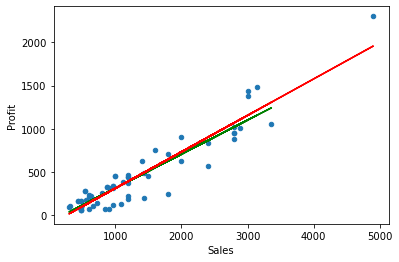

In [23]:
# visualize the result
copiers.plot.scatter(x='Sales', y='Profit')
plt.plot(copiers_new['Sales'], lm_no_outlier.fittedvalues, c='green')
plt.plot(copiers['Sales'], lm_outlier.fittedvalues, c='red')
plt.show()

⌛️ **Leverage vs. Influence**

**Leverage** adalah nilai yang letaknya jauh dari letak observasi lainnya, sering disebut sebagai **outlier**. Nilai leverage dapat mempengaruhi model linier regresi atau pun tidak.

- Ketika **leverage mempengaruhi (menurunkan R-Squared)** model linier regresi: **high influence**, sebaiknya **di-exclude** -> membuat model menjadi lebih jelek
- Ketika **leverage tidak mempengaruhi (meningkatkan R-Squared)** model linier regresi: **low influence**, sebaiknya **di-include** -> membuat model menjadi lebih baik

In [24]:
print("R-Squared model dengan outlier :",(lm_outlier.rsquared).round(2))
print("R-Squared model tanpa outlier :",(lm_no_outlier.rsquared).round(2))

R-Squared model dengan outlier : 0.88
R-Squared model tanpa outlier : 0.85


 **SUMMARY :**
 
 1. Machine Learning terbagi menjadi 2 yaitu :
     - Supervised Learning : Memiliki label / target variable (eg : Regresi, Klasifikasi)
     - Unsupervised Learning : Tidak memiliki label/target variable (eg : Clustering)
 2. Regression Model : Untuk memprediksi data numerical yang bersifat continuous
 3. Syarat dari regresi model : Harus memiliki hubungan linear antara variable target dan predictornya
 4. Keunggulan dari model regresi adalah dapat di interpretasikan.
 

**END OF DAY 1**

---

**START OF DAY 2**

In [25]:
## code here
# predict copiers datasest
copiers['Profit.Pred'] = lm_outlier.predict(X_data)
copiers.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Profit.Pred
0,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Consumer,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944,291.875166
1,393,US-2014-135972,2014-09-21,2014-09-23,Second Class,JG-15115,Consumer,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883,647.070635
2,407,CA-2017-117457,2017-12-08,2017-12-12,Standard Class,KH-16510,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,393.357894
3,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Home Office,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,1154.492734
4,596,CA-2014-131450,2014-08-08,2014-08-15,Standard Class,LR-16915,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,393.357894


In [26]:
copiers['Error'] = copiers['Profit'] - copiers['Profit.Pred']
copiers.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Profit.Pred,Error
0,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Consumer,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944,291.875166,44.119234
1,393,US-2014-135972,2014-09-21,2014-09-23,Second Class,JG-15115,Consumer,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883,647.070635,54.917665
2,407,CA-2017-117457,2017-12-08,2017-12-12,Standard Class,KH-16510,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,393.357894,41.633406
3,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Home Office,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,1154.492734,225.484266
4,596,CA-2014-131450,2014-08-08,2014-08-15,Standard Class,LR-16915,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,393.357894,41.633406


#### Evaluation

1. RMSE (Root Mean Square Error): Memperlakukan error dengan lebih sensitif. Ketika nilai error besar, maka nilai RMSE akan semakin besar dan sebaliknya. **Formula:**

   $RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y})^{2}}$ 


2. MAE (Mean Absolute Error): Memperlakukan error dengan lebih ringan. **Formula:**

   $MAE = \frac{1}{N} \sum_{i=1}^{N} \left | y_{i} - \hat{y} \right |$
   
RMSE digunakan ketika model yang dibuat memuat observasi outlier. Sedangkan, MAE digunakan ketika model yang dibuat tidak memuat observasi outlier 

**RMSE**

In [27]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs
import math

In [28]:
##code here
#manually calculated
math.sqrt((copiers['Error']**2).mean())

147.69971134001736

In [29]:
##code here
rmse(copiers['Profit'],copiers['Profit.Pred'])

147.69971134001733

**MAE**

In [2]:
copiers

NameError: name 'copiers' is not defined

In [28]:
##code here
#manually calculated
copiers['Error'].abs().mean()

114.75721597459486

In [29]:
##code here
meanabs(copiers['Profit'], copiers['Profit.Pred'])

114.75721597459489

In [30]:
copiers.shape

(62, 17)

📝 **Interpretasi error:**

Jika dibandingkan dengan interval nilai Profit, baik MAE dan RMSE yang diperoleh masih cukup besar, yaitu
- RMSE: prediction +- 147
- MAE: prediction +- 114


Solution yang dapat dilakukan untuk memperkecil error:
1. menambah pediktor
2. menambah jumlah sampel
3. melakukan scaling pada prediktor numerik

## Multiple Linear Regression

### Categorical Predictor: Dummy Variable

Kita akan membuat multiple linear regression menggunakan data copiers untuk memprediksi `Profit` berdasarkan `Sales` dan `Segment`.
- y: Profit
- x: Sales dan Segment

Sebelum melakukan fitting model, kita harus mengubah prediktor kategorik menjadi dummy variable, dengan cara:
- Dilakukan dengan menggunakan fungsi `pd.get_dummies()`
- **One hot encoding** = mengubah kolom kategorik menjadi kolom-kolom baru dari setiap kategori yang berisi nilai 0 dan 1 
- **Dummy variable** =  mengubah kolom kategorik menjadi kolom-kolom baru yang terdiri dari k-1 kategori, berisi nilai 0 dan 1. Kategori yang tidak menjadi kolom, akan menjadi kondisi basis. Untuk membuat dummy variable, tambahkan parameter `drop_first=True`

[One hot encoding vs. dummy variable](https://docs.google.com/spreadsheets/d/19Hw5I_hKd-e6MBoPBfCPTTUPAVV9c3UR7ZbU8dH2Vro/edit?usp=sharing)

In [31]:
## check categories value on Segment
copiers['Segment'].unique()

['Consumer', 'Home Office', 'Corporate']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']

In [32]:
copiers.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Segment,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Profit.Pred,Error
0,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Consumer,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,959.984,2,0.2,335.9944,291.875166,44.119234
1,393,US-2014-135972,2014-09-21,2014-09-23,Second Class,JG-15115,Consumer,TEC-CO-10002313,Technology,Copiers,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883,647.070635,54.917665
2,407,CA-2017-117457,2017-12-08,2017-12-12,Standard Class,KH-16510,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,393.357894,41.633406
3,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Home Office,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,1154.492734,225.484266
4,596,CA-2014-131450,2014-08-08,2014-08-15,Standard Class,LR-16915,Consumer,TEC-CO-10004115,Technology,Copiers,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913,393.357894,41.633406


**One hot encoding**

In [33]:
pd.get_dummies(copiers['Segment']).head()

,Consumer,Corporate,Home Office
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


**Dummy Variable**

In [34]:
pd.get_dummies(copiers['Segment'], drop_first=True).head()

,Corporate,Home Office
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


#### Membuat data dummy untuk variable segment

In [35]:
cat = pd.get_dummies(copiers['Segment'], drop_first = True)
cat.head()

,Corporate,Home Office
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [36]:
num = copiers[['Sales','Profit']]
num.head(2)

,Sales,Profit
0,959.984,335.9944
1,1799.970,701.9883


In [37]:
copiers['Ship.Mode'].unique()

['Second Class', 'Standard Class', 'First Class', 'Same Day']
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']

In [38]:
# turn to dummy variable 
cat = pd.get_dummies(copiers['Segment'], drop_first = True)
#cat2 = pd.get_dummies(copiers['Ship.Mode'], drop_first = True)
num = copiers[['Sales','Profit']]

# re-join with `pd.concat()`
copiers_new = pd.concat([num, cat], axis=1)
copiers_new.head()

,Sales,Profit,Corporate,Home Office
0,959.984,335.9944,0,0
1,1799.970,701.9883,0,0
2,1199.976,434.9913,0,0
3,2999.950,1379.9770,0,1
4,1199.976,434.9913,0,0


#### Membuat model multiple linear regression

In [39]:
X = copiers_new.drop('Profit', axis=1)

In [40]:
X.head(2)

,Sales,Corporate,Home Office
0,959.984,0,0
1,1799.970,0,0


In [41]:
Y = copiers_new['Profit']
X = sm.add_constant(copiers_new.drop('Profit', axis=1))

lm_multiple = sm.OLS(Y, X).fit()
lm_multiple.summary()

C:\Users\dyahn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     150.7
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.39e-27
Time:                        08:30:40   Log-Likelihood:                -396.73
No. Observations:                  62   AIC:                             801.5
Df Residuals:                      58   BIC:                             810.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -132.0709     35.433     -3.727      0.000    -202.999     -61.143
Sales           0.4179      0.020     20.585      0.000       0.377       0.459
Corporate      44.2994     44.272      1.001      0.321     -44.320     132.919
Home Office    61.8840     52.981      1.168      0.248     -44.169     167.937
==============================================================================
Omnibus:                        2.417   Durbin-Watson:                   2.348
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                1.779
Skew:                          -0.404   Prob(JB):                        0.411
Kurtosis:                       3.189   Cond. No.                     5.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**[Example]**

> Terdapat category golongan darah A, AB, B, dan O

> Cara menginterpretasikan model apabila memiliki lebih dari 2 kategori :

> y = b0 + 1.96* gol.darahA + 0.97* gol.darahB + 1.39* gol.darahO

> - slope gol.darahA = 1.96, nilai y ketika golongan darah nya adalah A sebesar **b0 + 1.96**
> - slope gol.darahB = 0.97, nilai y ketika golongan darah nya adalah B sebesar **b0 + 0.97**
> - slope gol.darahO = 1.39, nilai y ketika golongan darah nya adalah O sebesar **b0 + 1.39**
> - nilai y ketika golongan darah nya adalah AB sebesar **b0 saja** (b0 + est. gol.darahA * 0 + est. gol.darahB * 0 + est. gol.darahO * 0)

📝 **Interpretasi model:**

1. Model linier regresi untuk kasus Profit prediction adalah `Profit = -132.071 + 0.418 Sales + 44.299 Segment_Corporate + 61.884 Segment_Home_Office`
   - `Sales`: Seyiap kenaikan sales sebesar 1 USD akan meningkatkan profit sebesar 0.418
   - `Segment_Corporate`: Nilai profit ketika segmentnya adalah Corporate maka sebesar (Profit = -132.071 + (0.418*Sales) + (44.299 * Segment_Corporate) + 0 )
   - `Segment_Home_Office`: Nilai profit ketika segmentnya adalah Home_Office maka sebesar (Profit = -132.071 + (0.418*Sales) + (0) + (61.884 * Segment Home_Office)
   - `Segment_Consumer` : Nilai profit ketika segmentnya adalah Consumer maka sebesar (Profit = -132.071 + (0.418*Sales) + 0 + 0)
   - `intercept`: Nilai profit akan menjadi -132.071 ketika semua nilai prediktornya adalah 0
2. Signifikansi prediktor (bandingkan nilai p-value dengan alpha, note: signifikan jika p-value < alpha)
- H0 : Variable predictor tidak significant terhadap target 
- H1 : Variable predictor significant terhadap target

    Variable predictor dapat dikatakan significat terhadapt target ketika p-value < 0.05 (menolak H0) :
    Category Segment : p-value > 0.05 (gagal tolak H0 / terima H0)
   - Sales siginificant terhadap Profit
   - Segment tidak significant terhadap profit

note: untuk prediktor kategorik, dianggap signifikan mempengaruhi target jika salah satu kategori signifikan

### R-Squared vs. Adj. R-Squared

Perbedaan R-Squared dan Adj. R-Squared:

- **R-Squared**: Seberapa baik model menjelaskan data, dengan mengukur seberapa besar informasi (variansi) dari target dapat dijelaskan oleh prediktor. Sehingga, jelas ketika **prediktor bertambah**, informasi (variansi) yang dirangkum semakin banyak atau dengan kata lain jelas nilai **R-Squared akan meningkat**.
- **Adj. R- Squared**: tidak demikian pada adj. r-squred, karena disesuaikan dengan jumlah prediktor yang digunakan. Adj. r-squared akan meningkat hanya jika prediktor baru yang ditambahkan mengarah pada hasil prediksi yang lebih baik (prediktor signifikan mempengaruhi target)

   Formula Adj. R-Squared: $R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-p-1}$

In [42]:
print('Adjusted R-Squared single linear regression: ',(lm_outlier.rsquared_adj).round(4))
print('Adjusted R-Squared multiple linear regression: ',(lm_multiple.rsquared_adj).round(4))

Adjusted R-Squared single linear regression:  0.8809
Adjusted R-Squared multiple linear regression:  0.8805


In [43]:
print('R-Squared single linear regression: ',(lm_outlier.rsquared).round(4))
print('R-Squared multiple linear regression: ',(lm_multiple.rsquared).round(4))

R-Squared single linear regression:  0.8828
R-Squared multiple linear regression:  0.8863


#### Membuat model multiple linear regression ke-2

In [44]:
copiers_new_update = copiers[['Sales', 'Quantity', 'Profit']]
copiers_new_update.head(2)

,Sales,Quantity,Profit
0,959.984,2,335.9944
1,1799.970,3,701.9883


In [45]:
Y = copiers_new_update['Profit']
X = sm.add_constant(copiers_new_update.drop('Profit', axis=1))

lm_multiple_new = sm.OLS(Y, X).fit()
lm_multiple_new.summary()

C:\Users\dyahn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     248.8
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.77e-29
Time:                        08:30:40   Log-Likelihood:                -394.57
No. Observations:                  62   AIC:                             795.1
Df Residuals:                      59   BIC:                             801.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.6342     39.326     -1.389      0.170    -133.324      24.056
Sales          0.4859      0.032     15.351      0.000       0.423       0.549
Quantity     -43.3435     17.371     -2.495      0.015     -78.102      -8.585
==============================================================================
Omnibus:                        2.232   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.543
Skew:                          -0.127   Prob(JB):                        0.462
Kurtosis:                       3.730   Cond. No.                     3.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
print('R-Squared multiple linear regression update: ',(lm_multiple_new.rsquared).round(4))
print('R-Squared multiple linear regression: ',(lm_multiple.rsquared).round(4))

print('Adjusted R-Squared multiple linear regression update: ',(lm_multiple_new.rsquared_adj).round(4))
print('Adjusted R-Squared multiple linear regression: ',(lm_multiple.rsquared_adj).round(4))

R-Squared multiple linear regression update:  0.894
R-Squared multiple linear regression:  0.8863
Adjusted R-Squared multiple linear regression update:  0.8904
Adjusted R-Squared multiple linear regression:  0.8805


### Predicting

In [47]:
pred_model = lm_multiple.fittedvalues 

pred_model_update = lm_multiple_new.fittedvalues

prediction = pd.DataFrame({
    'actual': copiers['Profit'],
    'pred_model': pred_model, # ketika segment terlibat dalam model
    'pred_model_update': pred_model_update # ketika melibatkan quantity dan menghapus segment
})
prediction.head()

,actual,pred_model,pred_model_update
0,335.9944,269.145351,325.113844
1,701.9883,620.209584,689.901044
2,434.9913,369.447746,398.377157
3,1379.9770,1183.613946,1186.257890
4,434.9913,369.447746,398.377157


### Evaluation

In [48]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs

rmse_multiple1 = rmse(prediction['actual'], prediction['pred_model'])
rmse_multiple2 = rmse(prediction['actual'], prediction['pred_model_update'])
mae_multiple1 = meanabs(prediction['actual'], prediction['pred_model'])
mae_multiple2 = meanabs(prediction['actual'], prediction['pred_model_update'])

In [49]:
pd.DataFrame({
    'model': ['lm_multiple', 'lm_multiple_new'],
    'rmse': [rmse_multiple1, rmse_multiple2],
    'mae': [mae_multiple1, mae_multiple2]
})

,model,rmse,mae
0,lm_multiple,145.46320,113.556058
1,lm_multiple_new,140.47366,101.275693


**SUMMARY OF DAY 2 :**

1. Model evaluation yang terdapat pada Linear Regression adalah :
    - RMSE (Root Mean Squared Error) : cocok digunakan untuk data yang memiliki outlier
    - MAE (Mean Absolout Error) : bisa digunakan ketika data kita tidak memiliki outlier

2. Multiple Linear Regression 
    - Mengubah data yang bersifat categorical kedalam bentuk numerical
    - Bisa menggunakan one hot encoding / dummy variable. Disarankan menggunakan dummy variable ( kolom yang terbentuk n-1 ) dikarenakan one hot encoding akan menyebabkan multicolinearity (hubungan yang kuat antara variable predictor)
    - R-Squared dan Adj. R-Squared :
        - R-Squared : berapa % variansi variable target yang dijelaskan oleh predictor yang terlibat. Semakin banyak variable predictor maka R-Squared semakin meningkat
        - Adj. R-Squared : Akan meningkat ketika variable predictor significant terhadap variable target, sedangkan ketika variable predictor tidak significant bisa jadi nilai Adj.R-Squared turun atau tetap.

**END OF DAY 2**

---

**START OF DAY 3**

# Assumption Checking

Limitasi dari pemodelan linear regresi adalah terdapat beberapa asumsi yang perlu dipenuhi agar model linear regresi dikatakan model yang baik. 
Pendekatan Ordinary Least Square/Linear Regression dikatakan BLUE (Best Linear Unbiased Estimator) ketika memenuhi beberapa uji asumsi berikut:
1. **Linearity**: antara x dan y nya ada hubungan linear  
    - Bisa dilihat dari R-squared model, jika R-squared kecil, maka kemungkinan antara prediktor dan target, tidak ada hubungan linear
2. **Normality of Residual**: Residual nya berdistribusi normal 
    - Saat berdistribusi normal, error berada di sekitar 0
3. **No-Heteroscedasticity**: Variansi residual konstan (tidak membentuk sebuah pola)  
4. **Little to No-Multicollinearity**: antar variabel prediktor nya harus independence (tidak mempunyai hubungan)  


## Linearity

**Dilakukan sebelum membuat model**. Untuk menguji apakah variabel target dan prediktor memiliki hubungan linear. Dapat dilihat dengan nilai korelasi. 

pearson correlation = $$r =  \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$


Linearity artinya target variabel dengan prediktornya memiliki hubungan yang linear atau hubungannya bersifat garis lurus. Selain itu, efek atau nilai koefisien antar variabel bersifat additive. Jika linearity ini tidak terpenuhi, maka otomatis semua nilai koefisien yang kita dapatkan tidak valid karena model berasumsi bahwa pola yang akan kita buat adalah linear.

In [50]:
copiers_new_update.corr()

,Sales,Quantity,Profit
Sales,1.000000,0.797954,0.939578
Quantity,0.797954,1.000000,0.685993
Profit,0.939578,0.685993,1.000000


Selain menggunakan method `corr()`, kita bisa melihatnya berdasarkan visualisasi.

Text(0.5, 1.0, 'Correlation Heatmap')

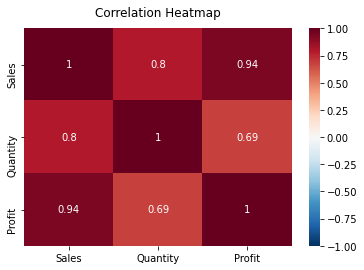

In [51]:
import seaborn as sns
heatmap = sns.heatmap(copiers_new_update.corr(), cmap='RdBu_r', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [1]:
linearity_test(lm_multiple_new, Y)

NameError: name 'linearity_test' is not defined

Bagaimana apabila ada yang tidak linear?

1. Exclude variable tersebut dalam model
2. Apabila mayoritas variable predictor tidak linear, maka bisa mengganti model.

## Normality of Residual

Harapannya ketika membuat model linear regression, error yang dihasilkan berdistribusi normal. Artinya error banyak berkumpul disekitar angka 0. Untuk mengecek residual menyebar normal, pengujian yang paling sering dilakukan adalah Shapiro test:
- $H_0$: Residual berdistribusi normal
- $H_1$: Residual tidak berdistribusi normal

> Recall materi practical statistics, apabila kita ingin mendapat kesimpulan residual homogen (tidak membentuk pola) maka **p-value yang kita dapatkan harus lebih besar dari pada alpha.**

Jika asumsi normalitas tidak terpenuhi, maka hasil uji signifikansi serta nilai standard error dari intercept dan slope setiap prediktor yang dihasilkan bersifat bias atau tidak mencerminkan nilai sebenarnya. Jika residual memiliki distribusi yang tidak normal, bisa lakukan **transformasi/scaling data pada target variabel** atau **menambahkan sample data**.

In [53]:
pd.DataFrame({
    'Prediction': lm_multiple_new.fittedvalues,
    'Actual': copiers_new_update['Profit'],
    'Residual': lm_multiple_new.resid
}).head()

,Prediction,Actual,Residual
0,325.113844,335.9944,10.880556
1,689.901044,701.9883,12.087256
2,398.377157,434.9913,36.614143
3,1186.257890,1379.9770,193.719110
4,398.377157,434.9913,36.614143


Untuk melakukan pengujian asumsi normality of residual bisa menggunakan visualisasi histogram.

<AxesSubplot:>

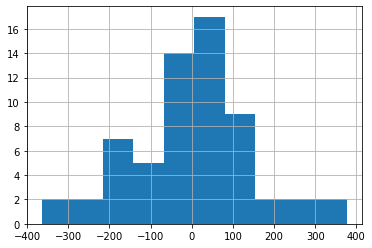

In [54]:
lm_multiple_new.resid.hist()

Selain itu bisa juga menggunakan pengujian statistik yaitu **Shapiro Test**.

In [55]:
from scipy.stats import shapiro

shapiro(lm_multiple_new.resid)

ShapiroResult(statistic=0.9664881825447083, pvalue=0.08819911628961563)

nilai p-value adalah 0.088 > alpha (0.05) -> Gagal tolak H0 / Terima H0 -> Residualnya terdistribusi normal.

Nilai p-value yang kita harapkan pada uji shapiro test yaitu **p-value > alpha**.

In [ ]:
name = {0 : 'Statistics',
       1: 'p-value'}

pd.DataFrame({shapiro(lm_multiple_new.resid)}).rename(columns = name)

Handling asumsi yang tidak terpenuhi untuk normality of residuals yaitu dengan cara:
- menambahkan data
- take out outlier -> kalau ada nilai outlier
- transformasi pada target varibel (y) -> dengan nilai log

## No Heteroscedasticity (Homoscedasticity)

Homocesdasticity menunjukkan bahwa residual atau error bersifat konstan atau tidak membentuk pola tertentu. Jika error membentuk pola tertentu seperti garis linear atau mengerucut, maka kita sebut dengan `Heterocesdasticity` dan akan berpengaruh pada nilai standard error pada estimate/koefisien prediktor yan bias (terlalu sempit atau terlalu lebar).

Homocesdasticity bisa dicek secara visual dengan melihat apakah ada pola antara hasil prediksi dari data dengan nilai residualnya. Pada plot berikut terlihat bahwa tidak terdapat pola tertentu sehingga kita bisa menyimpulkan bahwa model sudah memiliki error yang konstan.

Berikut adalah beberapa pola yang dapat terbentuk dan menyebabkan `Heteroscesdasticity`.

![](assets/heteroscedasticity.png)

Pada `lm_multiple_new` yang kita miliki, kita bisa memvisualisasikan sebaran dari residual yang ada dengan menggunakan scatter plot.

Text(0.5, 0, 'Nilai Prediksi')

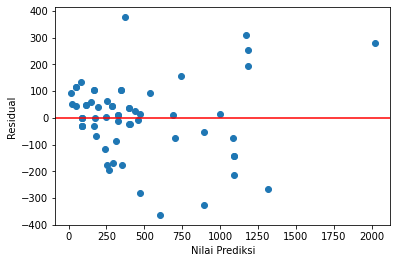

In [57]:
plt.scatter(y = lm_multiple_new.resid, x = lm_multiple_new.fittedvalues)
plt.axhline(y = 0, color = 'r')
plt.ylabel('Residual')
plt.xlabel('Nilai Prediksi')

Untuk mengecek terjadinya heteroscedasticity kita dapat menggunakan Breusch-Pagan test:
- $H_0$: residual homogen(tidak membentuk sebuah pola/acak)
- $H_1$: residual heteros (membentuk sebuah pola)

> Recall materi practical statistics, apabila kita ingin mendapat kesimpulan residual homogen (tidak membentuk pola) maka **p-value yang kita dapatkan harus lebih besar dari pada alpha**.

Kita bisa menggunakan method `het_breuschpagan()` dari library `statsmodels`.

In [58]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistics', 'p-value', 'f-value', 'f p-value']

test = sms.het_breuschpagan(lm_multiple_new.resid, lm_multiple_new.model.exog)
lzip(name, test)

[('Lagrange multiplier statistics', 23.92905956297605),
 ('p-value', 6.3660601438097795e-06),
 ('f-value', 18.541891768486476),
 ('f p-value', 5.648804012055128e-07)]

p-value < alpha : Error tidak homogen, cenderung membentuk pola.

Cara untuk mengatasi heteroscedasticity :

1. Menambahkan variable predictor 
2. Menambah jumlah data
3. log transformasi -> predictor
4. Mengganti model dengan Random Forest (tree based model)

## Little to No Multicolinearity

Harapannya pada model linear regression, tidak terjadi multikolinearitas. Multikolinearitas terjadi ketika antar variabel prediktor yang digunakan pada model memiliki hubungan yang kuat. Ada atau tidak multikolinearitas dapat dilihat dari nilai VIF(Variance Inflation Factor). 

VIF formula :

$$VIF =  \frac{1}{1-R^2_i}$$

dimana $R^2$ merupakan nilai r-squared pada setiap prediktor $i$. VIF nilainya dari 1 sampai dengan tak hingga. **Semakin besar nilai VIF maka akan semakin besar juga indikasi multicolinearity**. Beberapa peneliti mengatakan untuk menentukan adanya multicolinearity, VIF dibagi menjadi beberapa nilai berikut:
- 1 = tidak berkorelasi antar prediktornya
- antara 1 dan 5 = korelasinya moderate
- Lebih besar 5 = paling kuat berkorelasi antar prediktornya
- Biasanya VIF lebih besar 10 adalah yang menunjukkan variabel prediktor sangat berkorelasi kuat.

Ketika nilai VIF lebih dari 10 artinya terjadi multicolinearitas. harapannya mendapatkan VIF < 10

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

x = copiers_new_update.drop(columns = 'Profit')

xc = sm.add_constant(x)
vif = [vif(xc.values, i) for i in range(len(xc.columns))]
pd.Series(data=vif, index = xc.columns).sort_values(ascending=False)

C:\Users\dyahn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const       4.623932
Sales       2.752777
Quantity    2.752777
dtype: float64

In [60]:
copiers_new_update.corr()

,Sales,Quantity,Profit
Sales,1.000000,0.797954,0.939578
Quantity,0.797954,1.000000,0.685993
Profit,0.939578,0.685993,1.000000


Jika terjadi multicollinearity, yang bisa dilakukan adalah:
- Membuang salah satu variabel
- Membuat variabel baru, dari rata-rata nilai kedua variabel

> Ketika nilai VIF > 10 maka **ada hubungan yang kuat antar prediktor**. Yang diingkan ketika membuat model, nilai VIF < 10 agar **tidak ada hubungan antar prediktor**.

**Reference:**

[Verifikasi Uji Asumsi Pada Linear Regression](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)